In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
url = 'https://raw.githubusercontent.com/yakushinav/omo/main/data/iris.csv'
data = pd.read_csv(url)
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)

In [4]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

fn = ['sepal_length','sepal_width','petal_length','petal_width']
cn = data['species'].unique()

In [5]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [6]:
y_pred=mod_dt.predict(X_test)

print('accuracy (точность) классификатора Деревья решений',metrics.accuracy_score(y_pred,y_test))

print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора Деревья решений 0.9833333333333333
матрица ошибок
[[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]


In [7]:
new_iris=[1.3, 2.4, 5.6, 3.5]
y_new_iris=mod_dt.predict([new_iris])

print(y_new_iris)

['Iris-virginica']


/home/matvei228/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


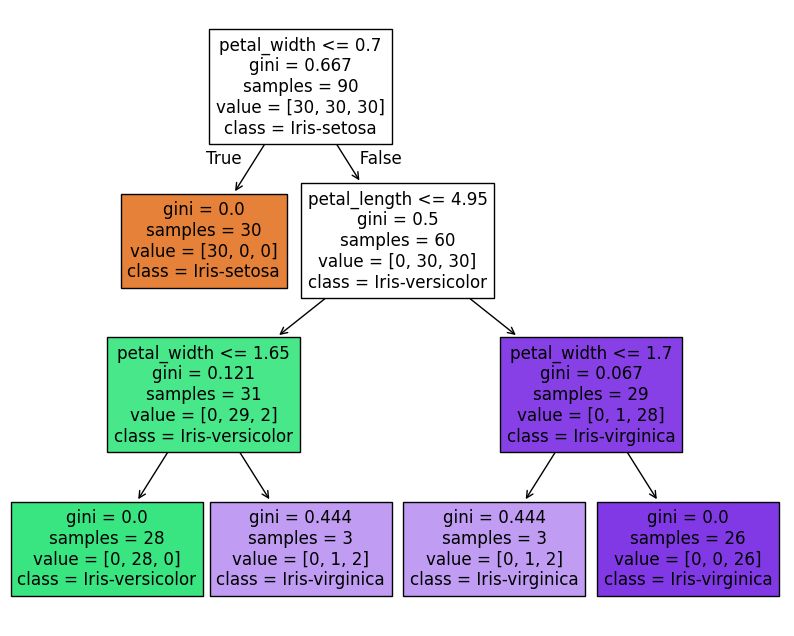

In [8]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);